In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

import tensorflow as tf 
from tensorflow import keras 

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

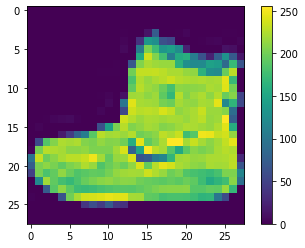

In [4]:
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

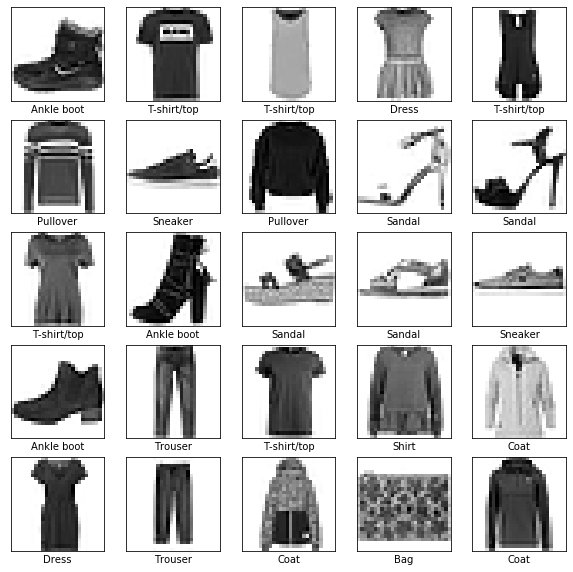

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

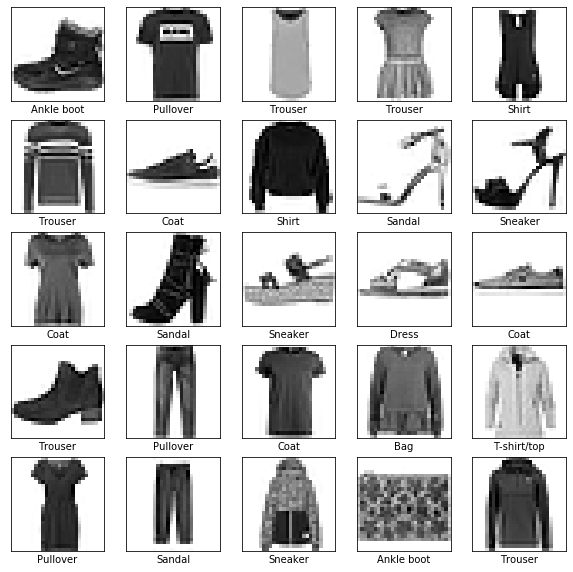

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128 , activation= tf.nn.relu),
    keras.layers.Dense(10, activation= tf.nn.softmax)
])

W1208 22:06:26.594352 140131058505536 deprecation.py:506] From /home/deepak/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.5014 - acc: 0.8242
Epoch 2/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3781 - acc: 0.8641
Epoch 3/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3372 - acc: 0.8776
Epoch 4/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3125 - acc: 0.8845
Epoch 5/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2961 - acc: 0.8909


In [11]:
test_lose , test_acc = model.evaluate(test_images, test_labels)
print('accr ::',test_acc)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.3459 - acc: 0.8748
accr :: 0.8748


In [12]:
pre = model.predict(test_images)

In [13]:
pre[0]

array([2.46422104e-07, 5.17242533e-08, 5.23580525e-07, 2.85888841e-08,
       2.99497970e-07, 1.95853412e-03, 4.00631734e-06, 1.44367805e-02,
       1.81036958e-05, 9.83581424e-01], dtype=float32)

In [14]:
pre[1]

array([8.6046139e-06, 6.8158190e-10, 9.9840754e-01, 6.6049088e-10,
       1.0092736e-03, 4.0250887e-14, 5.7460490e-04, 9.4360331e-20,
       1.5491384e-08, 7.2129200e-13], dtype=float32)

In [15]:
np.argmax(pre[1])

2

In [16]:
pre[45]

array([1.1102879e-04, 1.7930412e-04, 5.0385752e-05, 5.5107121e-06,
       1.0280433e-05, 3.0923413e-02, 2.8125747e-05, 7.9996675e-01,
       8.6401100e-04, 1.6786122e-01], dtype=float32)

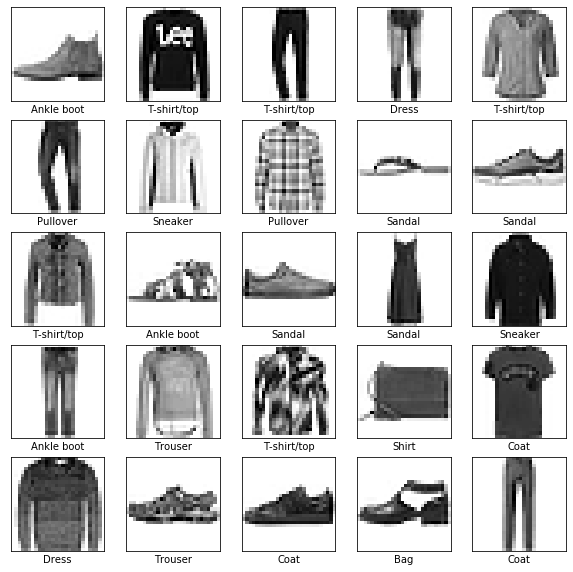

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [18]:
test_images[1].shape 

(28, 28)

In [19]:
a=np.argmax(pre[45])
class_names[a]

'Sneaker'

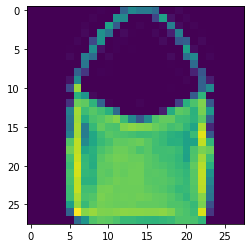

In [20]:
img = test_images[34]
plt.imshow(img)

In [22]:
import cv2
img=cv2.resize(img,(28,28))

In [23]:
print(img.shape)

(28, 28)


In [24]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [25]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.1115131e-07 3.0758031e-12 3.6799420e-08 5.9123269e-11 6.7436531e-07
  4.7114663e-09 1.0273481e-10 7.6236340e-14 9.9999881e-01 1.4127780e-13]]


In [26]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

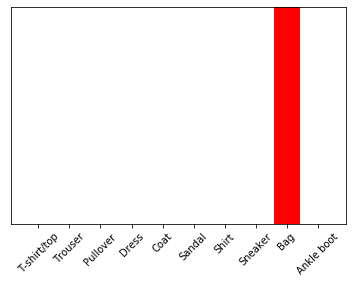

In [27]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)